# Walmart Sales Forecast

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading datasets
features=pd.read_csv('features.csv')
stores=pd.read_csv('stores.csv')
train=pd.read_csv('train.csv')

### Basic Info of dataset

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
features.describe()


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [10]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [11]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


### Checking for null values

In [12]:
features.isnull().value_counts()

Store  Date   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  CPI    Unemployment  IsHoliday
False  False  False        False       True       True       True       True       True       False  False         False        4140
                                       False      False      False      False      False      False  False         False        2069
                                                  True       False      False      False      False  False         False         701
                                                  False      False      False      False      True   True          False         451
                                                             True       False      False      False  False         False         174
                                                  True       False      True       False      False  False         False         167
                                                  False      False      True 

In [13]:
stores.isnull().value_counts()

Store  Type   Size 
False  False  False    45
Name: count, dtype: int64

In [14]:
train.isnull().value_counts()

Store  Dept   Date   Weekly_Sales  IsHoliday
False  False  False  False         False        421570
Name: count, dtype: int64

In [15]:
# Setting Date column to Datetime datatype
features['Date']=pd.to_datetime(features['Date'])
train['Date']=pd.to_datetime(train['Date'])

In [16]:
features['Week'] = features['Date'].dt.isocalendar().week.astype('int64')
features['Month'] = features['Date'].dt.month.astype('int64')
features['Year'] = features['Date'].dt.year.astype('int64')

features['Days'] = (features['Date'] - features['Date'].min()).dt.days

features['Grad'] = np.gradient(features['Fuel_Price'], features['Days'])

### Merging All datasets

In [17]:
train_df = train.merge(features,how='left').merge(stores,how='left')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Week,Month,Year,Days,Grad,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,5,2,2010,0,-0.003429,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.242170,8.106,6,2,2010,7,-0.004143,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,NaN,211.289143,8.106,7,2,2010,14,0.000929,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,NaN,211.319643,8.106,8,2,2010,21,0.007929,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,NaN,211.350143,8.106,9,3,2010,28,0.007571,A,151315


Dropping columns with a more than 60% Null values

In [18]:
train_df = train_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Days,Grad,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,5,2,2010,0,-0.003429,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,6,2,2010,7,-0.004143,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,7,2,2010,14,0.000929,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,8,2,2010,21,0.007929,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,9,3,2010,28,0.007571,A,151315


In [19]:
train_df.isnull().value_counts()

Store  Dept   Date   Weekly_Sales  IsHoliday  Temperature  Fuel_Price  CPI    Unemployment  Week   Month  Year   Days   Grad   Type   Size 
False  False  False  False         False      False        False       False  False         False  False  False  False  False  False  False    421570
Name: count, dtype: int64

### EDA Visualizations and Plots for Research

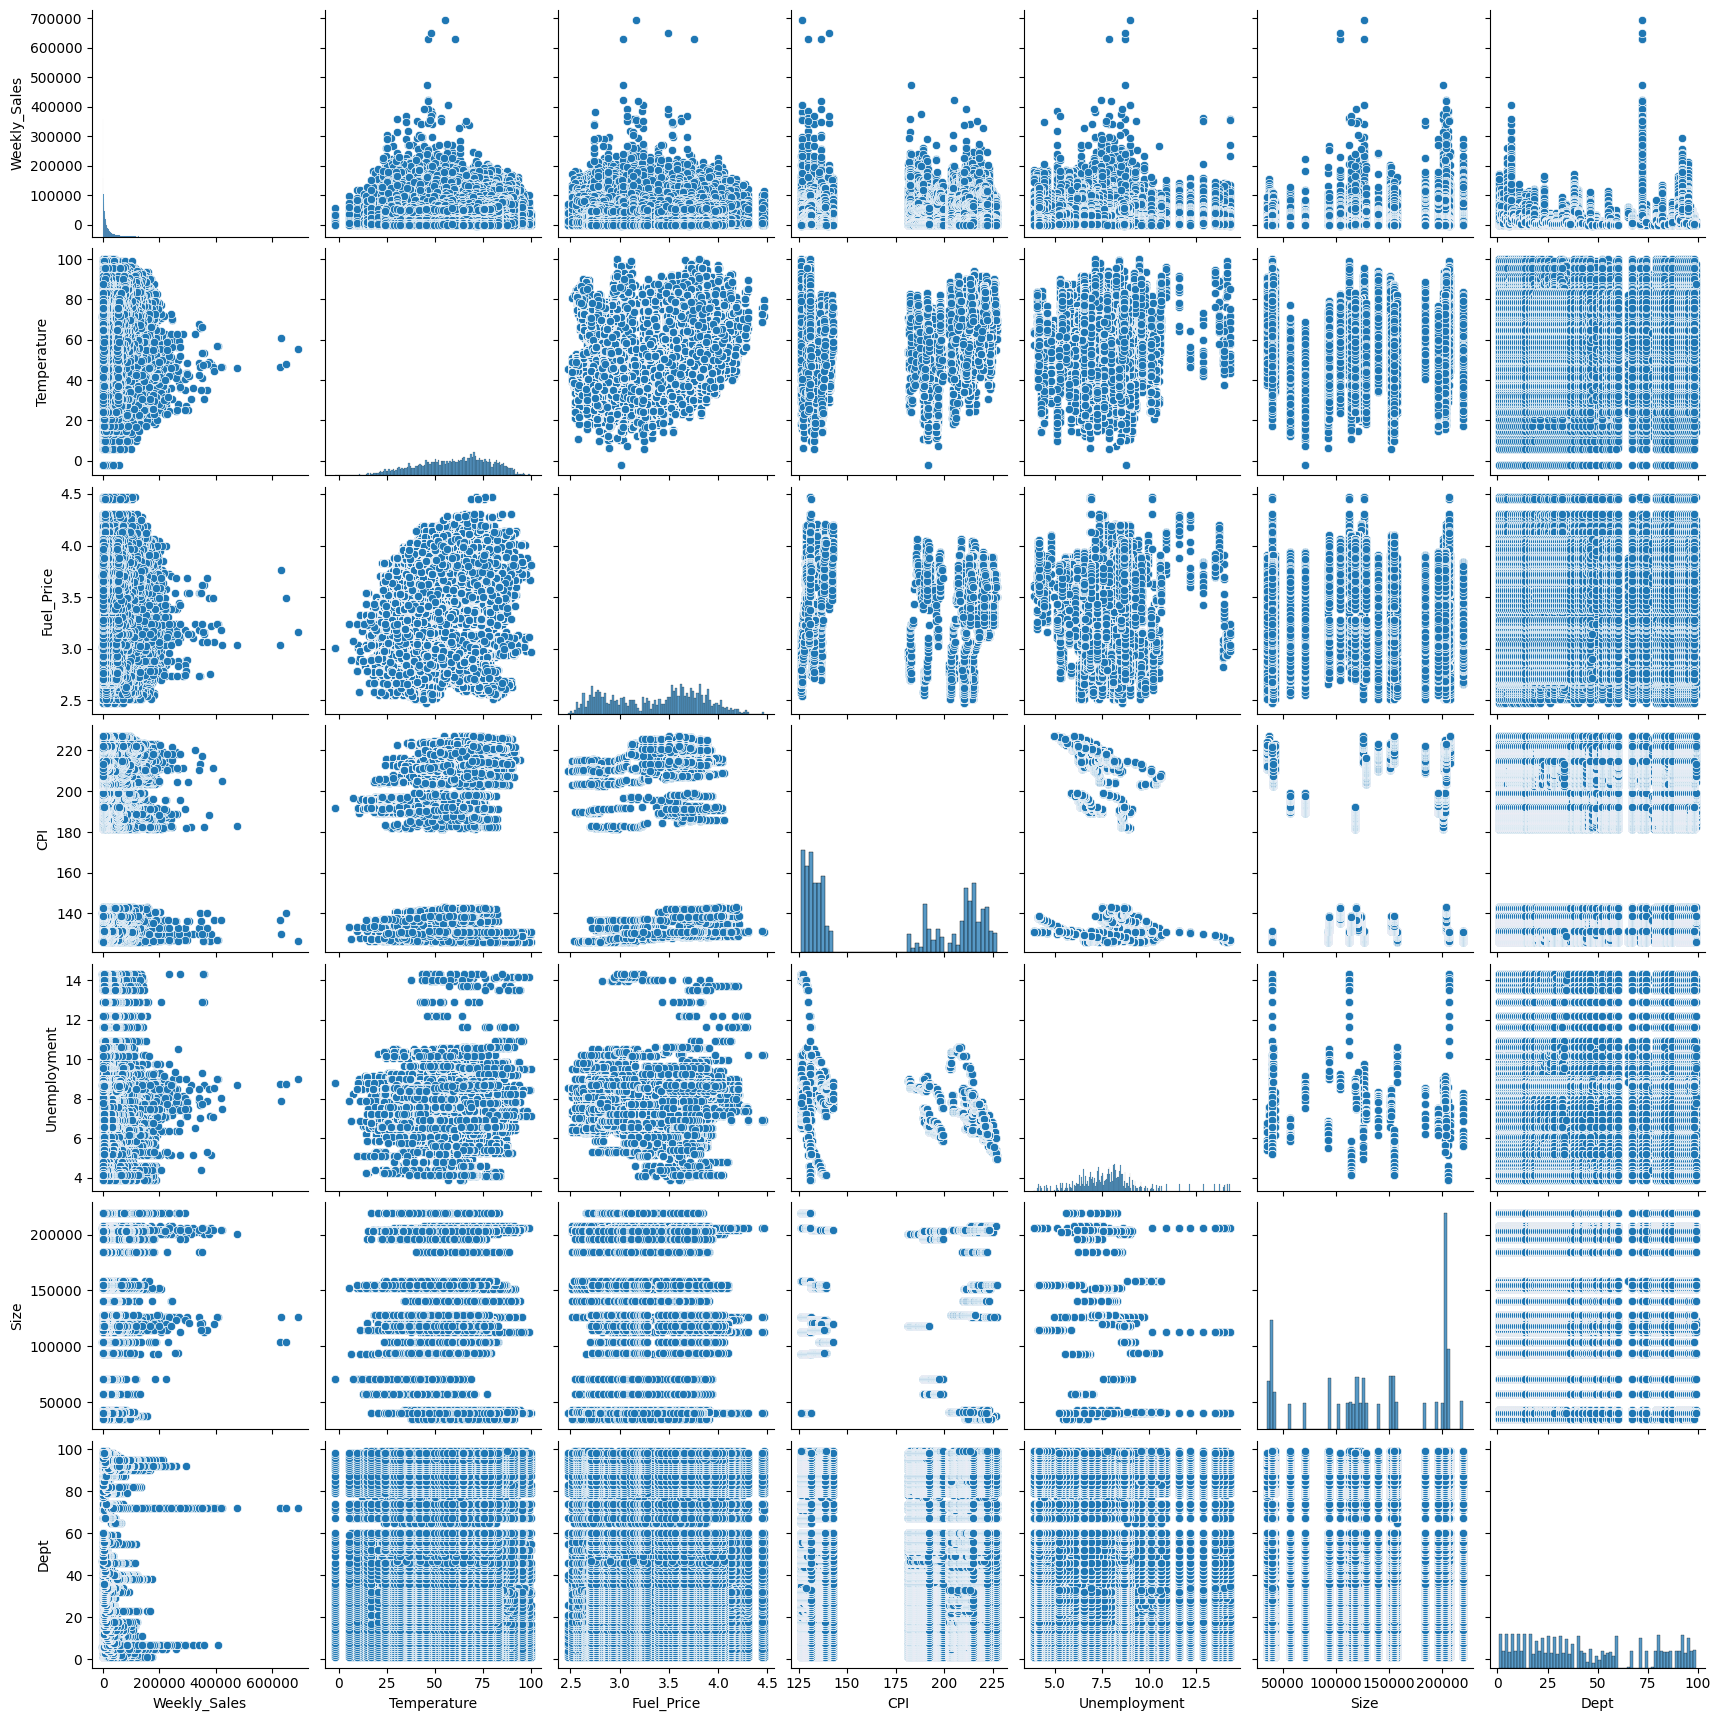

In [20]:
sns.pairplot(train_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Size','Type','Dept']])
plt.show()

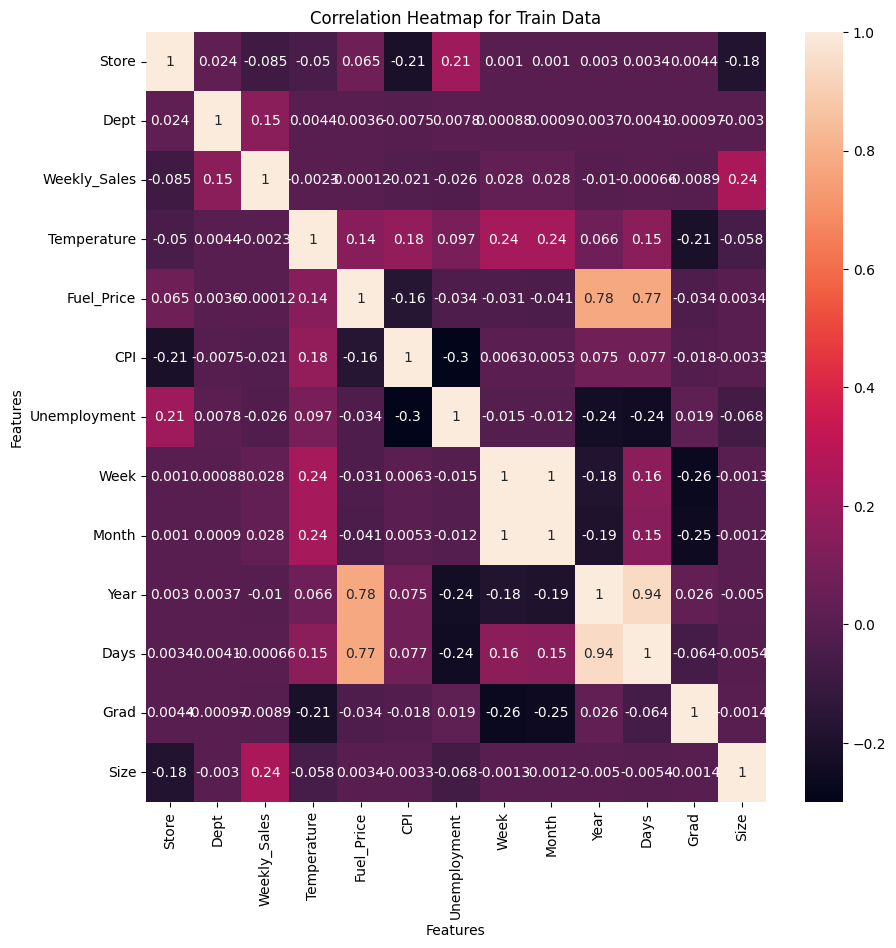

In [21]:
# Correlation Map for most Important features
numeric_df = train_df.select_dtypes(include=['float', 'int'])

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap for Train Data')
plt.show()

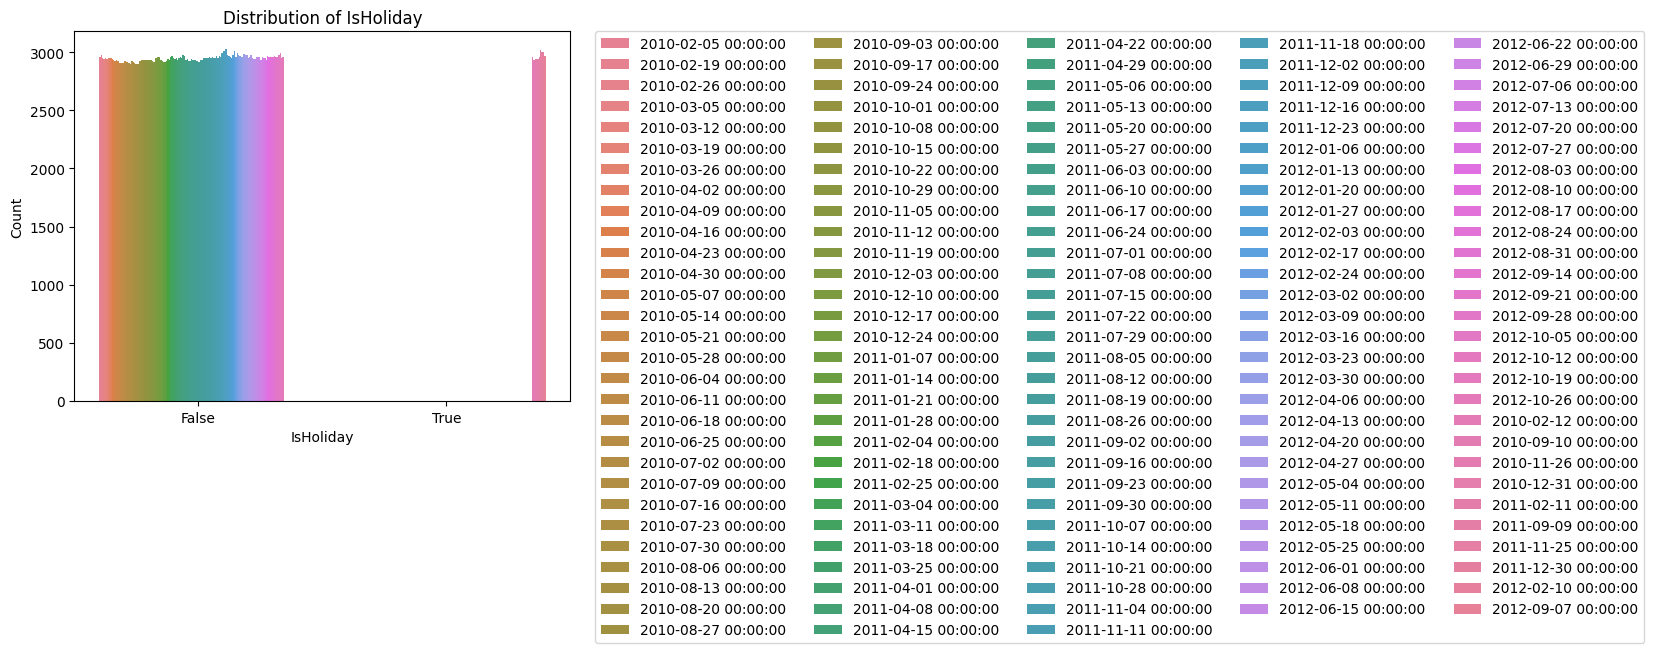

In [22]:
sns.countplot(x="IsHoliday", hue="Date", data=train_df)
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.title('Distribution of IsHoliday')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=5)
plt.show()


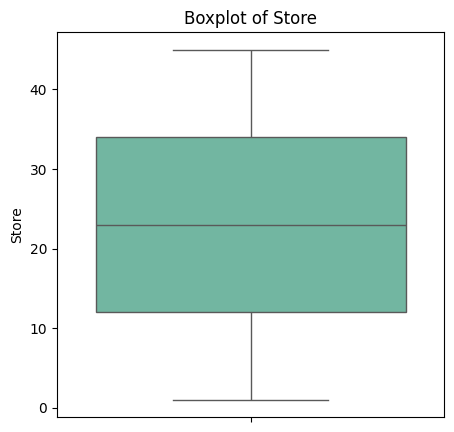

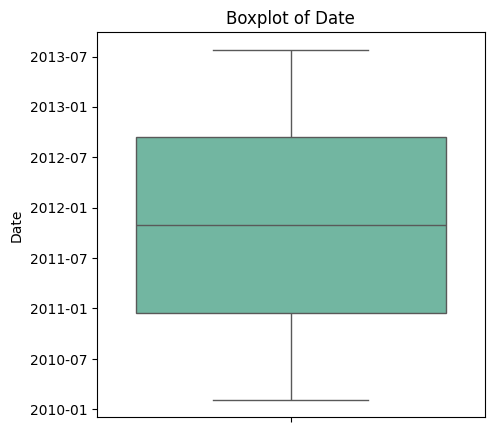

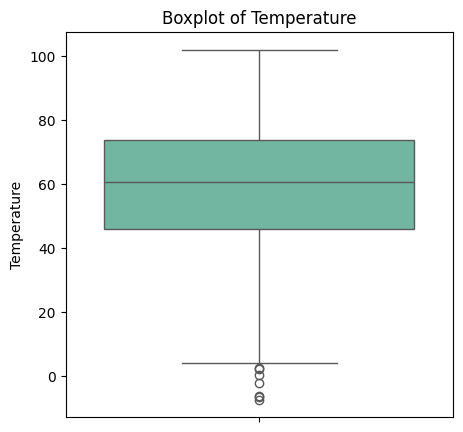

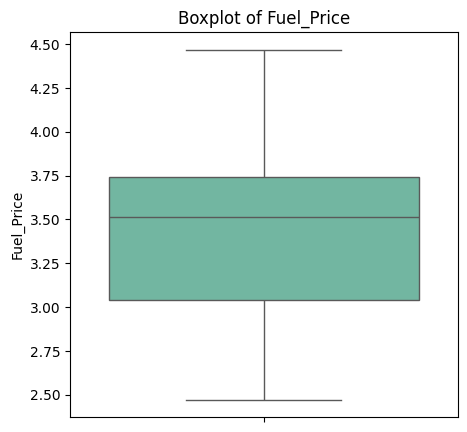

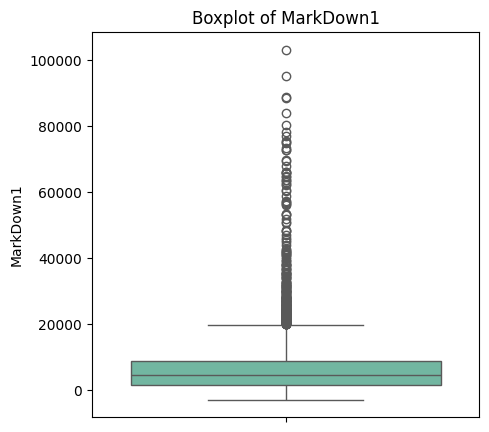

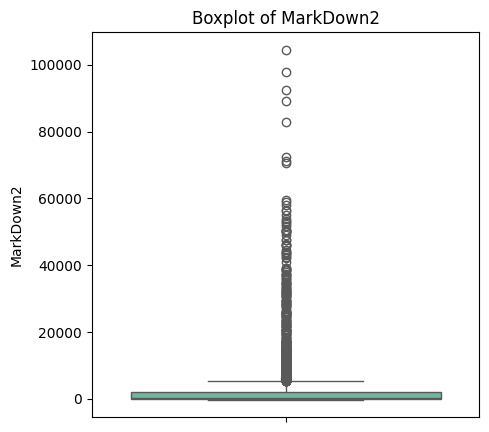

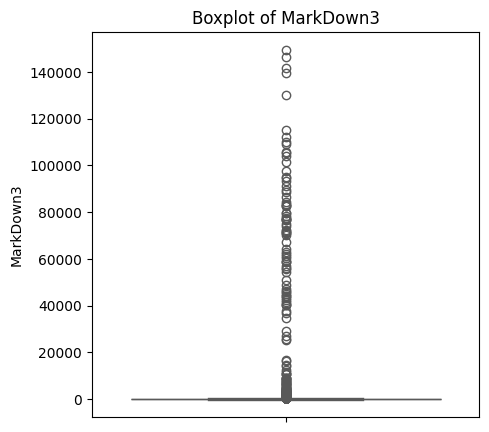

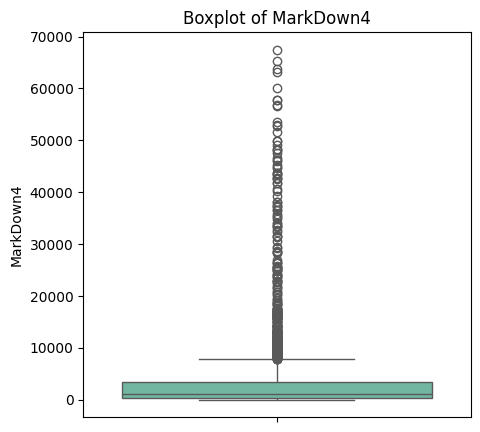

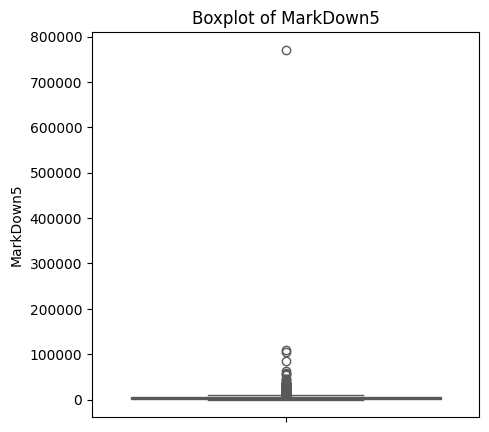

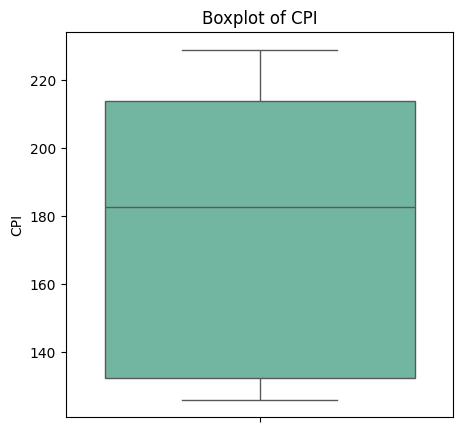

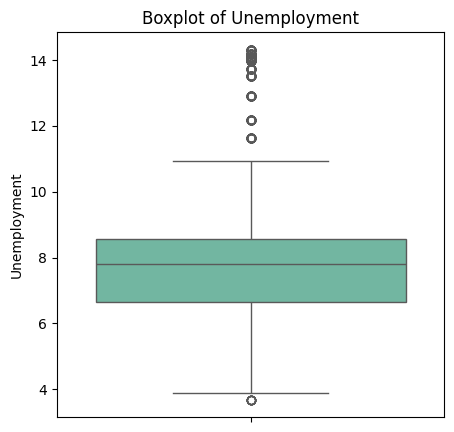

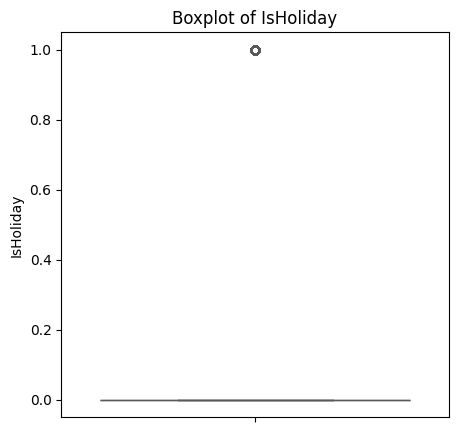

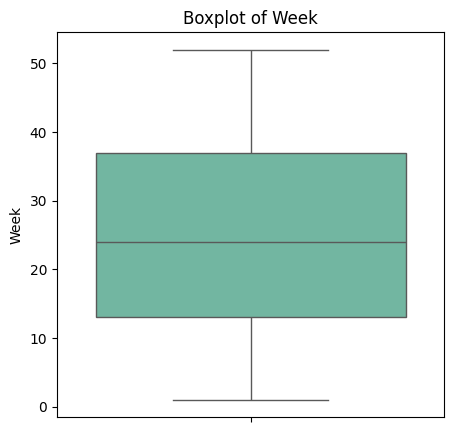

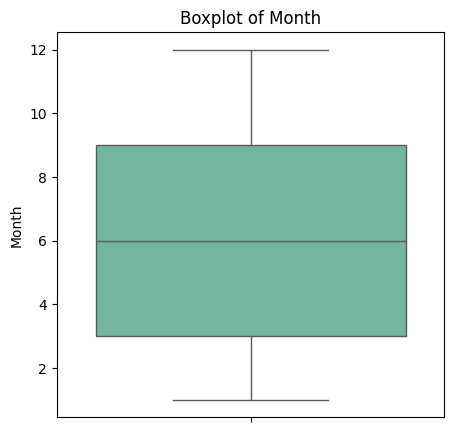

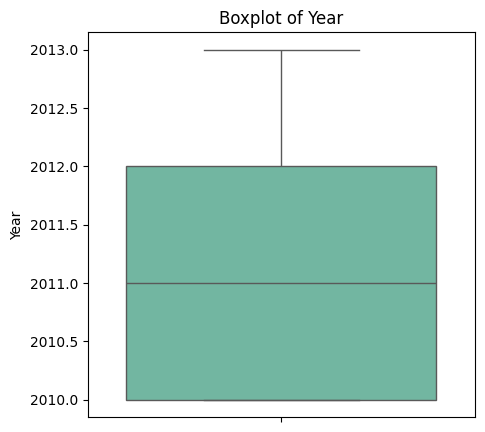

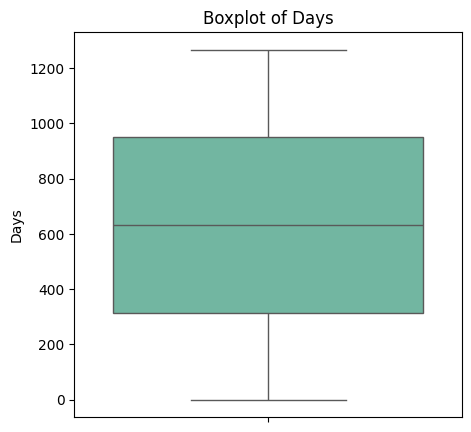

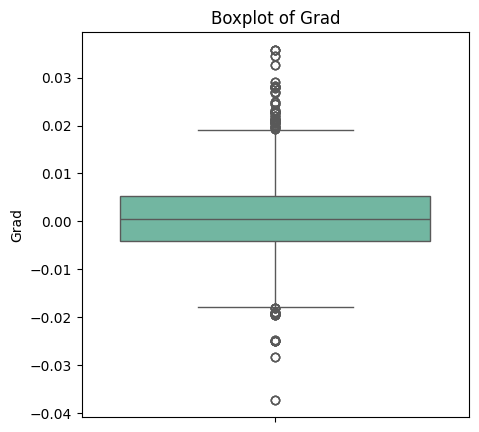

In [23]:
# Plots for searching Outliers
features_list = list(features.columns)
for feature in features_list:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=features[feature], palette="Set2")
    plt.title(f"Boxplot of {feature}")
    plt.show()


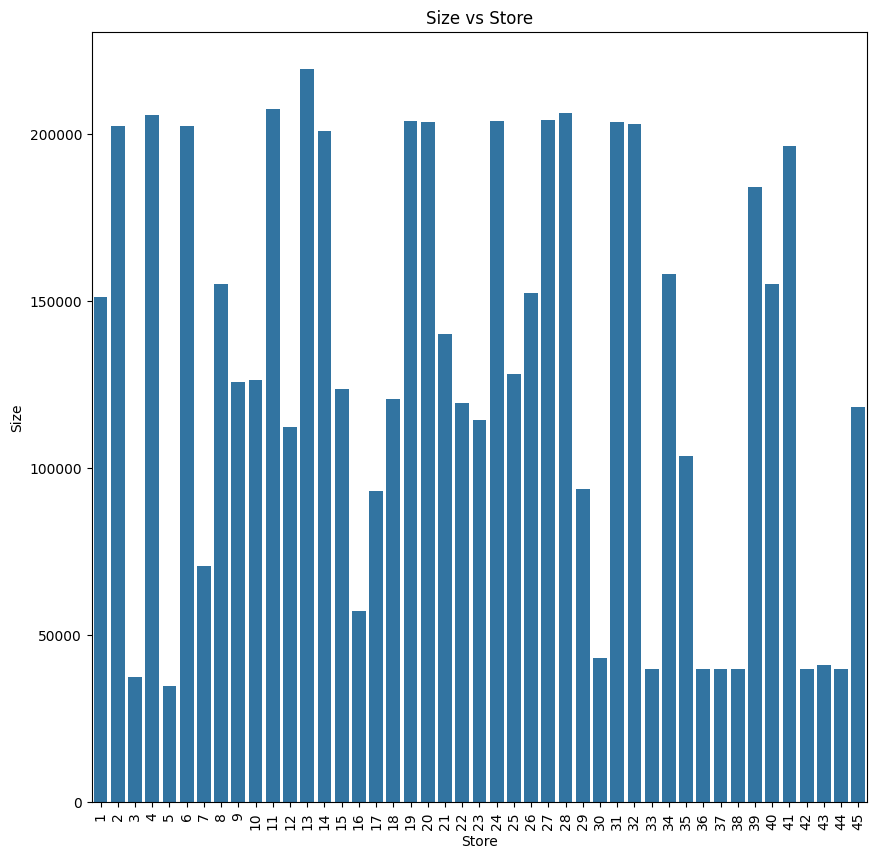

In [24]:
plt.figure(figsize=(10, 10))
sns.barplot(y='Size',x='Store',data=stores)
plt.ylabel('Size')
plt.xlabel('Store')
plt.title('Size vs Store')
plt.xticks(rotation=90)
plt.show()

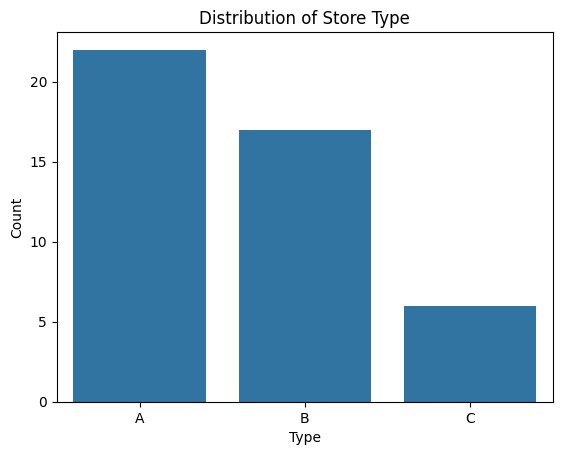

In [25]:
sns.countplot(x='Type',data=stores)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Store Type')
plt.show()

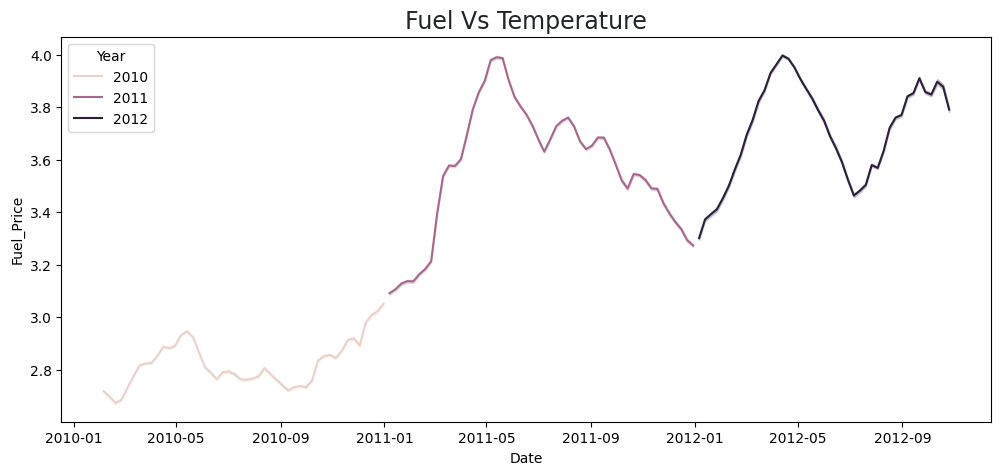

In [26]:
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=train_df, x='Date', y='Fuel_Price', hue='Year')
plt.title('Fuel Vs Temperature', fontsize=17, color='#212428')
plt.show()

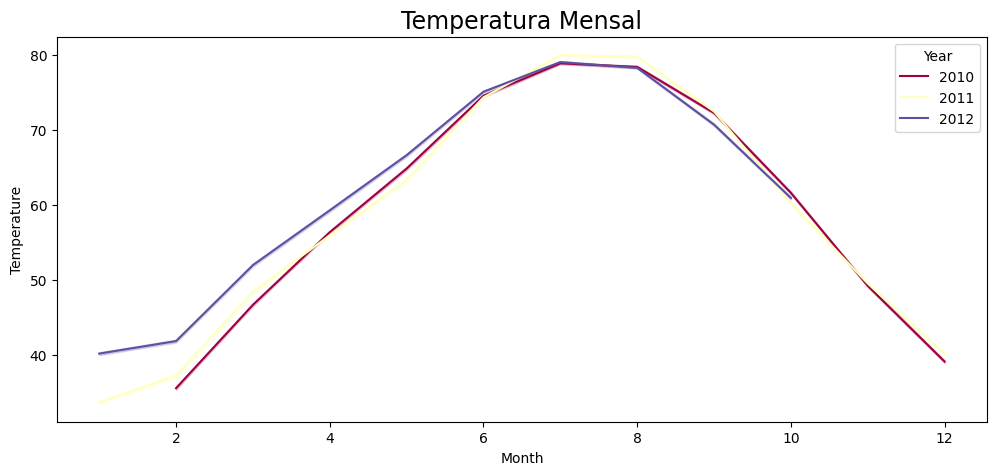

In [27]:
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=train_df, x='Month', y='Temperature', hue='Year',palette="Spectral")
plt.title('Temperatura Mensal', fontsize=17)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

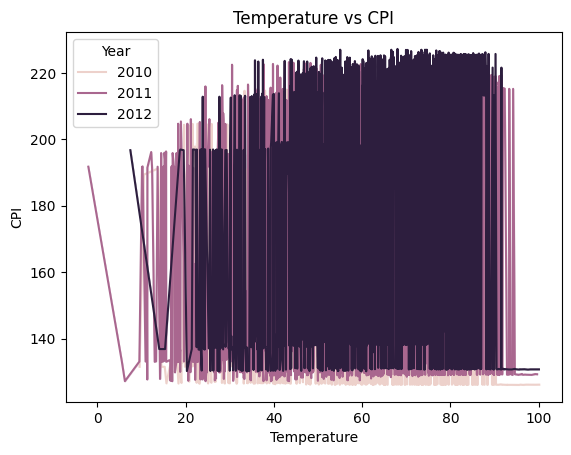

In [28]:
sns.lineplot(x='Temperature',y='CPI',hue='Year',data=train_df)
plt.xlabel('Temperature')
plt.ylabel('CPI')
plt.title('Temperature vs CPI')
plt.show

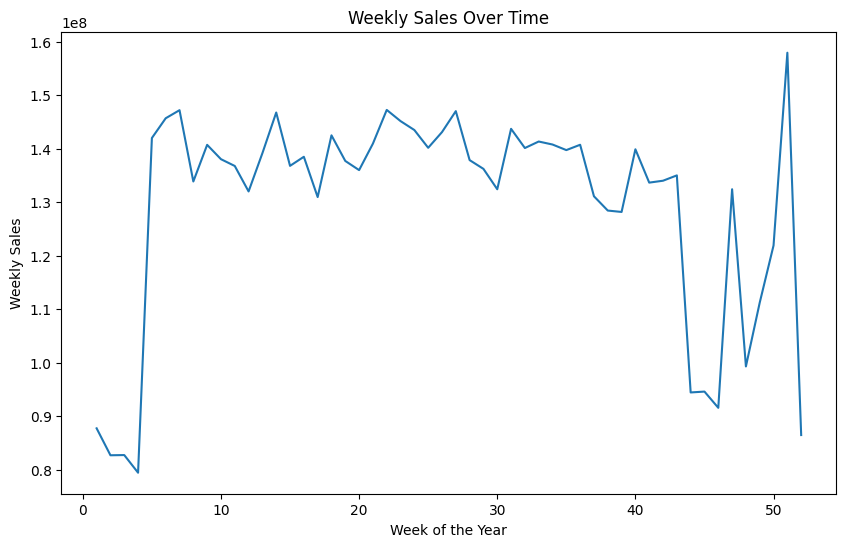

In [29]:
import datetime as dt

train_df['Date'] = pd.to_datetime(train_df['Date'])

train_df['WeekOfYear'] = train_df['Date'].dt.isocalendar().week

weekly_sales = train_df.groupby('WeekOfYear')['Weekly_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values)
plt.xlabel('Week of the Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.show()

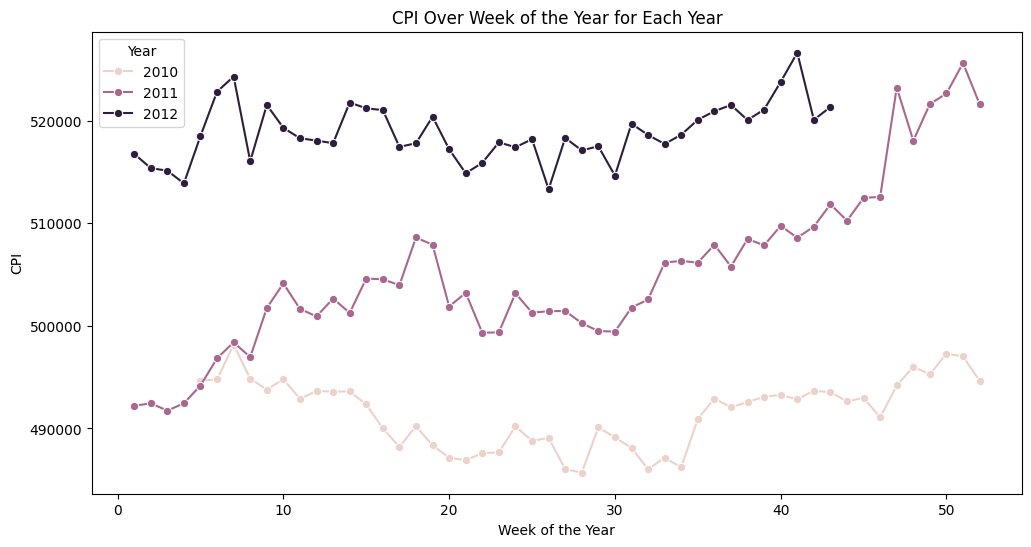

In [30]:
cpi_weekly_sales = train_df.groupby(['WeekOfYear', 'Year'])[['CPI', 'Weekly_Sales']].sum().reset_index()

plt.figure(figsize=(12, 6))

# Plot CPI for each year
sns.lineplot(data=cpi_weekly_sales, x='WeekOfYear', y='CPI', hue='Year', marker='o')
plt.xlabel('Week of the Year')
plt.ylabel('CPI')
plt.title('CPI Over Week of the Year for Each Year')
plt.legend(title='Year')
plt.show()

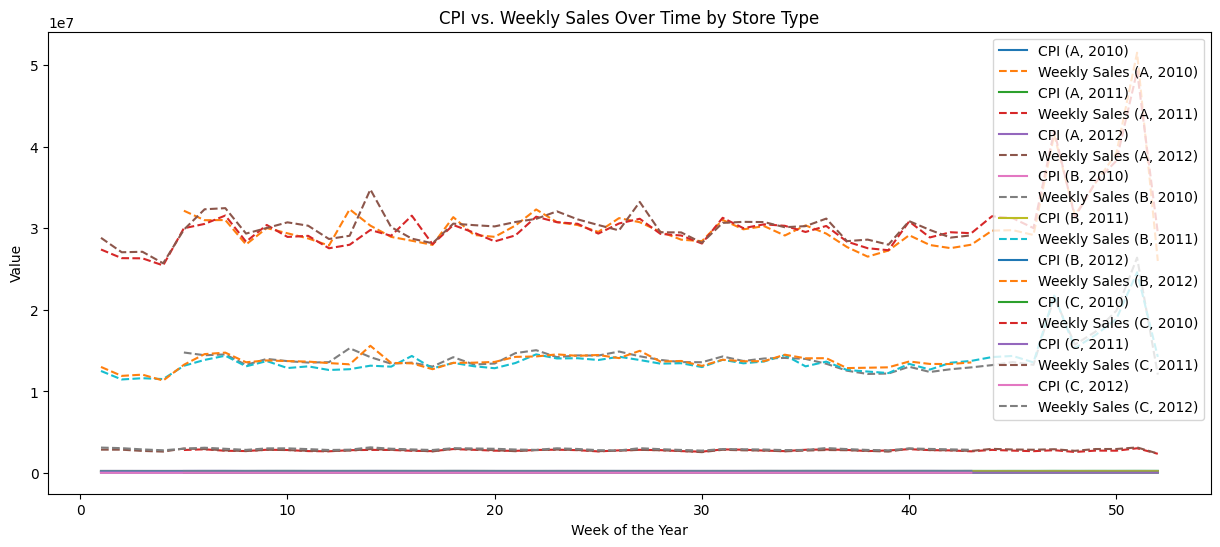

In [31]:

cpi_weekly_sales_by_store_type = train_df.groupby(['WeekOfYear','Year', 'Type'])[['CPI', 'Weekly_Sales']].sum()

plt.figure(figsize=(15, 6))

for (store_type, year), data in cpi_weekly_sales_by_store_type.groupby(['Type', 'Year']):
    sns.lineplot(x='WeekOfYear', y='CPI', data=data, label=f'CPI ({store_type}, {year})')
    sns.lineplot(x='WeekOfYear', y='Weekly_Sales', data=data, label=f'Weekly Sales ({store_type}, {year})', linestyle='--')

plt.xlabel('Week of the Year')
plt.ylabel('Value')
plt.title('CPI vs. Weekly Sales Over Time by Store Type')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


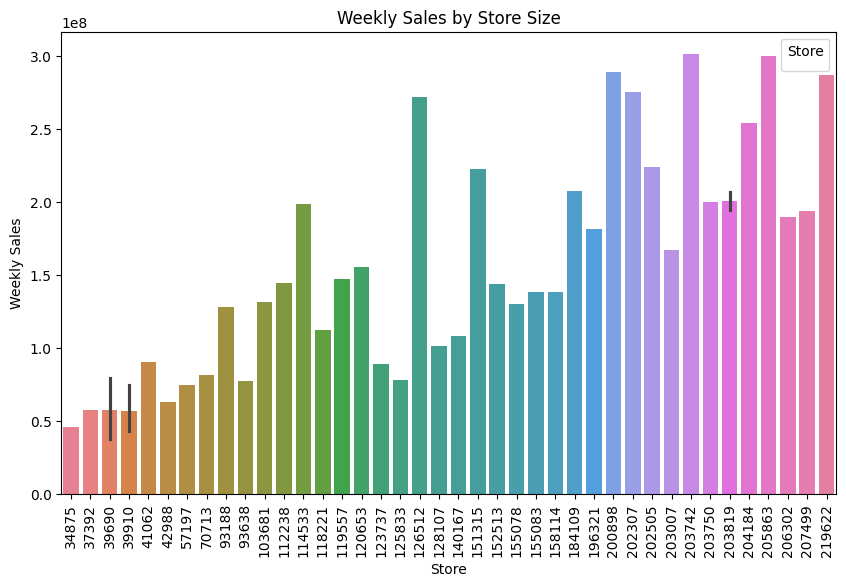

In [32]:

weekly_sales_by_store_size = train_df.groupby(['Store', 'Size'])['Weekly_Sales'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.barplot(data=weekly_sales_by_store_size)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.title('Weekly Sales by Store Size')
plt.xticks(rotation=90)
plt.show()


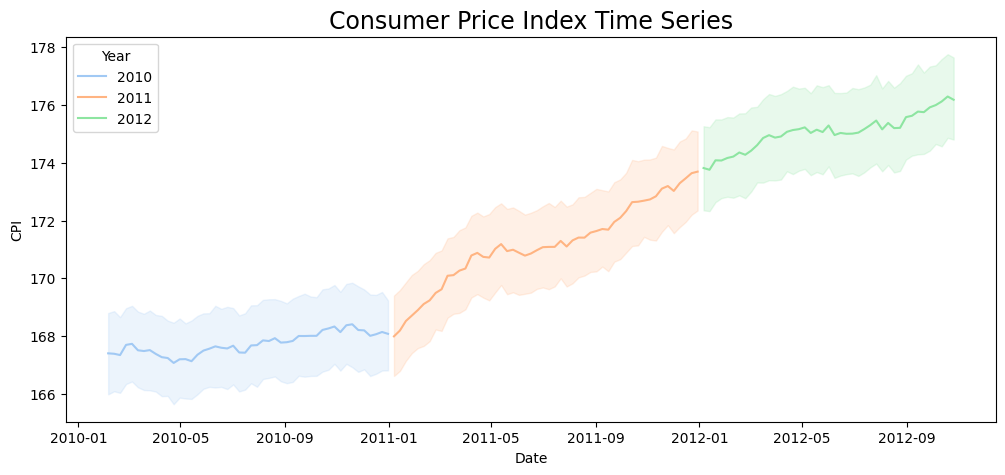

In [33]:
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=train_df, x='Date', y='CPI', hue='Year',palette="pastel")
plt.title('Consumer Price Index Time Series', fontsize=17)
plt.show()

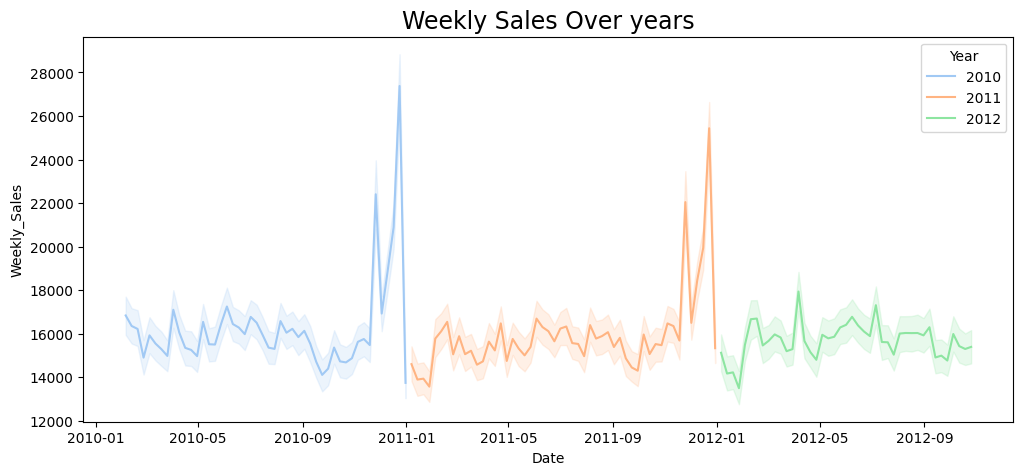

In [34]:
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=train_df, x='Date', y='Weekly_Sales', hue='Year',palette="pastel")
plt.title('Weekly Sales Over years', fontsize=17)
plt.show()

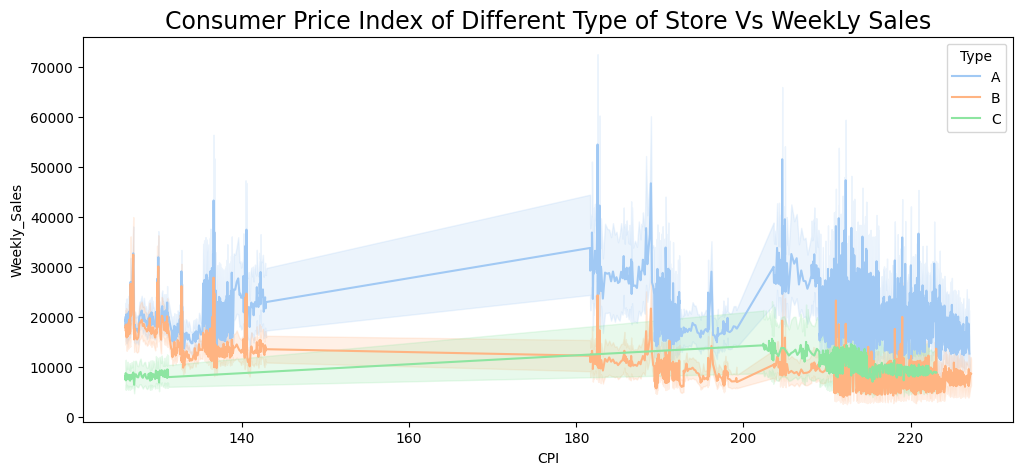

In [35]:
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=train_df, x='CPI', y='Weekly_Sales', hue='Type',palette="pastel")
plt.title('Consumer Price Index of Different Type of Store Vs WeekLy Sales', fontsize=17)
plt.show()

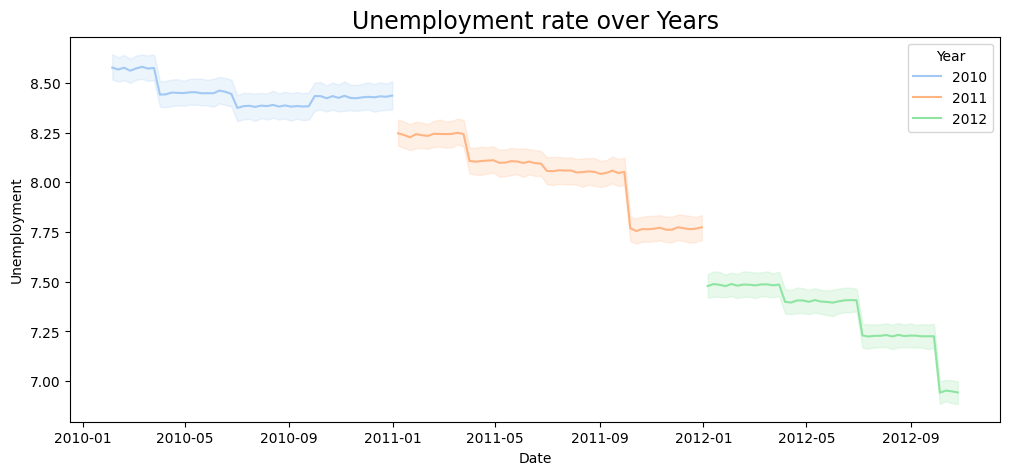

In [36]:
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=train_df, x='Date', y='Unemployment',hue='Year',palette="pastel")
plt.title('Unemployment rate over Years', fontsize=17)
plt.show()

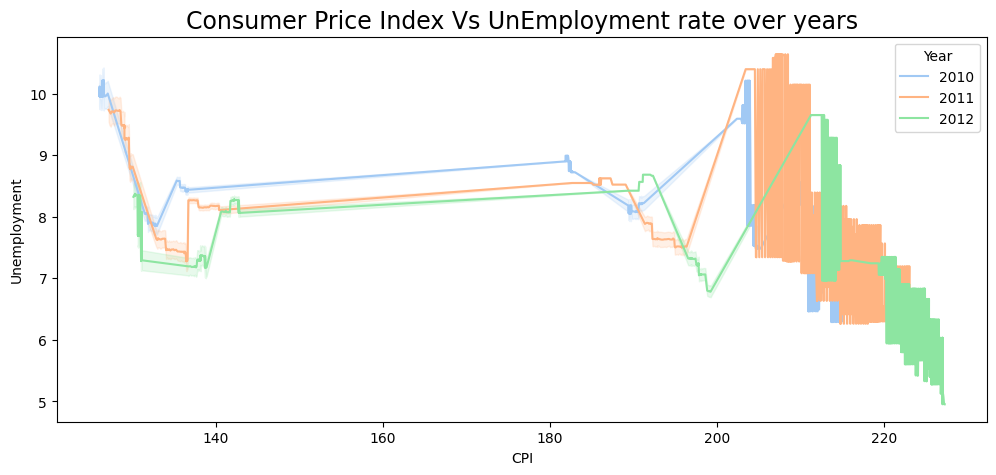

In [37]:
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=train_df, x='CPI', y='Unemployment',hue='Year',palette="pastel")
plt.title('Consumer Price Index Vs UnEmployment rate over years', fontsize=17)
plt.show()

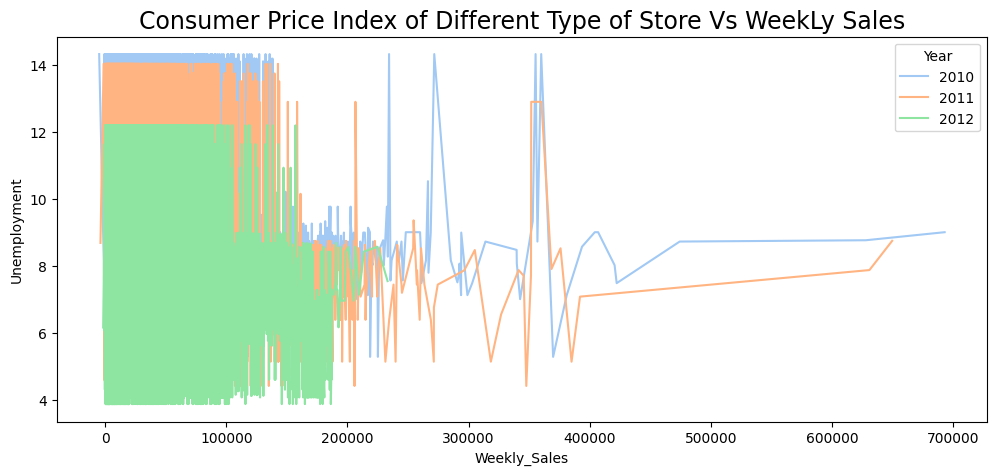

In [38]:
plt.figure(figsize=(12, 5))#, dpi=500)
sns.lineplot(data=train_df, x='Weekly_Sales', y='Unemployment',hue='Year',palette="pastel")
plt.title('Consumer Price Index of Different Type of Store Vs WeekLy Sales', fontsize=17)
plt.show()

##  Model TRaining and Testing

In [39]:
#Basic Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_df['Type'] = le.fit_transform(train_df['Type'])

In [40]:
#Splitting dataset
val = train_df[train_df["Date"] >= "2012-01-01"]
train = train_df[train_df["Date"] < "2012-01-01"]

In [41]:
train = train.drop(columns=["Date","Week","Month","Year","Days","Grad"]).astype("float")
val = val.drop(columns=["Date","Week","Month","Year","Days","Grad"]).astype("float")

In [42]:
tr_columns = train.columns

In [43]:
from sklearn.preprocessing import MinMaxScaler
#Basic Preprocessing
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
val = scaler.transform(val)

In [44]:
#Converting to Dataframe
train = pd.DataFrame(train, columns=tr_columns)
val = pd.DataFrame(val, columns=tr_columns)

In [45]:
#Seperating Features and response variable
train_x = train.drop(columns=["Weekly_Sales"])
train_y = train["Weekly_Sales"]
val_x = val.drop(columns=["Weekly_Sales"])
val_y = val["Weekly_Sales"]

1. Random Forest Regressor Model

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(train_x, train_y)

RandomForestRegressor(random_state=42)

In [47]:
from sklearn.metrics import mean_squared_error
pred_y = model.predict(train_x)
mse11 = mean_squared_error(train_y, pred_y)

print('Train Mean Squared Error:', mse11)

pred_y = model.predict(val_x)
mse12 = mean_squared_error(val_y, pred_y)

print('Val Mean Squared Error:', mse12)

Train Mean Squared Error: 3.890115362432713e-06
Val Mean Squared Error: 5.1446642361122154e-05


2. Linear Model

In [48]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(train_x,train_y)

LinearRegression()

In [49]:
pred_y = model1.predict(train_x)
mse21 = mean_squared_error(train_y, pred_y)

print('Train Mean Squared Error:', mse21)

pred_y = model1.predict(val_x)
mse22 = mean_squared_error(val_y, pred_y)

print('Val Mean Squared Error:', mse22)

Train Mean Squared Error: 0.000990530541190111
Val Mean Squared Error: 0.000912488081685797


3. Polynomial Model

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(train_x)
poly_model = LinearRegression()
poly_model.fit(X_poly, train_y)

LinearRegression()

In [51]:
X_test_poly = poly_features.transform(train_x)
y_pred_poly = poly_model.predict(X_test_poly)
mse31 = mean_squared_error(train_y, y_pred_poly)

print('Train Mean Squared Error:', mse31)

X_val_poly = poly_features.transform(val_x)
pred_y = poly_model.predict(X_val_poly)
mse32 = mean_squared_error(val_y, pred_y)

print('Val Mean Squared Error:', mse32)

Train Mean Squared Error: 0.000856288065766422
Val Mean Squared Error: 0.0008024595762117998


4. Ridge model

In [52]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(train_x, train_y)

Ridge(random_state=42)

In [53]:
pred_y = ridge_model.predict(train_x)
mse41 = mean_squared_error(train_y, pred_y)

print('Train Mean Squared Error:', mse41)

pred_y = ridge_model.predict(val_x)
mse42 = mean_squared_error(val_y, pred_y)

print('Val Mean Squared Error:', mse42)

Train Mean Squared Error: 0.000990530541560685
Val Mean Squared Error: 0.0009124881332018295


4. Lasso Model

In [56]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0, random_state=42) 
lasso_model.fit(train_x, train_y)

Lasso(random_state=42)

In [57]:
pred_y = lasso_model.predict(train_x)
mse51 = mean_squared_error(train_y, pred_y)

print('Train Mean Squared Error:', mse51)

pred_y = lasso_model.predict(val_x)
mse52 = mean_squared_error(val_y, pred_y)

print('Val Mean Squared Error:', mse52)

Train Mean Squared Error: 0.001081859314792009
Val Mean Squared Error: 0.001004423539667388


### Comparing Evaluation metrices

In [58]:
mse_train = [mse11, mse21,mse31,mse41,mse51]
mse_val = [mse12,mse22,mse32,mse42,mse52]

# Model names
models = ['RandomForestRegressor', 'Linear Regression', 'Polynomial Regression', 'Ridge','Lasso']

# Creating a DataFrame
data = {
    'Model': models,
    'Train MSE': mse_train,
    'Validation MSE': mse_val
}

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with Seaborn
df_melted = df.melt(id_vars='Model', var_name='Dataset', value_name='MSE')

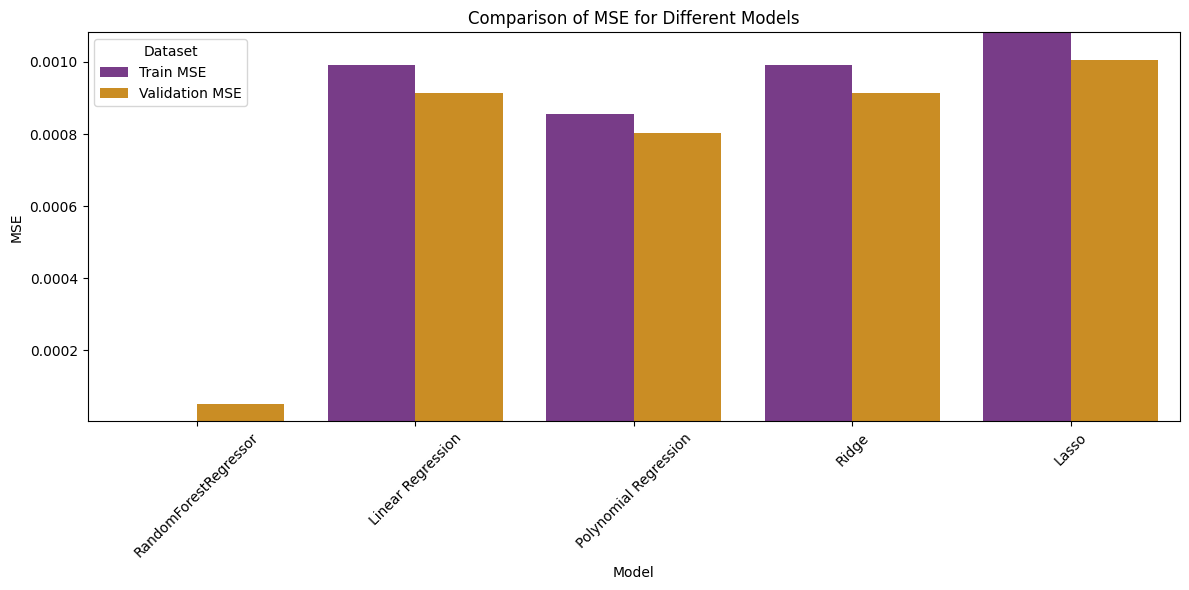

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=df_melted,palette="CMRmap")
plt.title('Comparison of MSE for Different Models')
plt.xticks(rotation=45)

# Optional: Set y-axis limits to include both positive and negative values
plt.ylim(df_melted['MSE'].min(), df_melted['MSE'].max())

plt.tight_layout()
plt.show()